# Проект. Принятие решений в бизнесе на основе данных


Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.



Цель: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Описание данных: Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv. Скачать датасет
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

План работы:


Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
Часть 2. Анализ A/B-те
ста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


In [1]:

#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Откроем таблицу и изучим общую информацию о данных

In [2]:


data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

#Изучим данные

data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 5 столбцов, 9 строк. Названия столбцов необходимо привести к нижнему регистру.

Типы данных:
- целочисленные int64-Reach,Impact,Confidence,Efforts.
- строки object(3)-Hypothesis.


In [4]:
data = data.rename(columns={'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact': 'impact', 'Confidence': 'confidence', 'Efforts': 'efforts'}) 


In [5]:
#проверим данные на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет.

##  Приоритизация гипотез.


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
data['ICE']=(data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))
pd.options.display.max_colwidth = 1

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<div class="alert alert-block alert-warning">

    
Можно увеличить ширину столбцов, если полностью не помещается информация, для этого можно написать следующий код: 
    
    pd.options.display.max_colwidth = 1

Вместо print() лучше использовать display(), тогда данные будут выведены в табличном виде.
</div>


Наиболее перспективные гипотезы по ICE: 
8	Запустить акцию, дающую скидку на товар в день рождения	16.200000
0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	13.333333
7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	11.200000
6	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	8.000000





### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [7]:
data['RICE']=(data['reach']*data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))



,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	112.0
2	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	56.0
0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	40.0
6	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	40.0

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


В лидерах уже гипотезы под номером 7, 2. Так получилось, потому что параметр Reach этих гипотез равен 10 и 8 соответственно, в то время как у других гипотез он меньше (учитывает как много пользователей она затронет).


## Анализ A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [8]:


orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders = orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'})

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.head(5))
print(visitors.head(5))



      orderId      userId       date  revenue group
0  3667963787  3312258926 2019-08-15  1650     B   
1  2804400009  3642806036 2019-08-15  730      B   
2  2961555356  4069496402 2019-08-15  400      A   
3  3797467345  1196621759 2019-08-15  9759     B   
4  2282983706  2322279887 2019-08-15  2308     B   
        date group  visitors
0 2019-08-01  A     719     
1 2019-08-02  A     619     
2 2019-08-03  A     507     
3 2019-08-04  A     717     
4 2019-08-05  A     756     


In [9]:
#проверим данные на явные дубликаты
orders.duplicated().sum()

0

Дубликатов нет.

In [10]:
#проверим данные на явные дубликаты
visitors.duplicated().sum()

0

Дубликатов нет.

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


В таблице 5 столбцов, 1197 строк, пропусков нет. 

Типы данных:

целочисленные int64-orderId,userId,revenue.
строки object-group.
дата datetime64-date.

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


В таблице 3 столбца, 62 строки, пропусков нет. 

Типы данных:

целочисленные int64-visitors.
строки object-group.
дата datetime64-date.

In [13]:
orders.query('group == "A"')['userId'].nunique()

503

In [14]:
orders.query('group == "B"')['userId'].nunique()

586

In [15]:
orders['userId'].nunique()

1031

Всего 1031 пользователей, значит есть 58 пользователей попавших в обе группы (это 5,6%). В группе В больше пользователей, чем в А.

Формируем кумулятивные данные

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


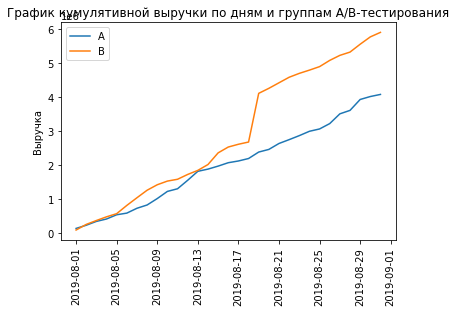

In [17]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.ylabel('Выручка')
plt.show()





    

</div>
 новые библиотеки визуализации и новые методы в уже изученных.  Прикрепляю несколько интересных ссылок по визуализации:


https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
    
____________________
 
*Техническую строку над графиком можно убрать, если написатьв конце ячейки:*
    
    plt.show()
</div>

Выручка группы А равномерно увеличивается в течение всего теста. 
График выручки группы B также растет, но не плавно, в одной из точкек резкий рост. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

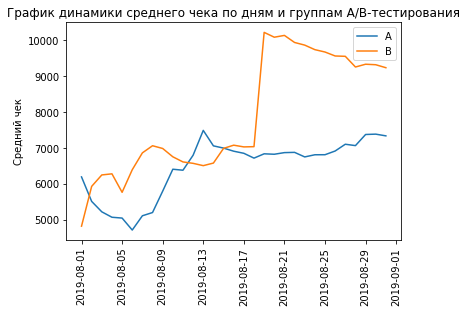

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('График динамики среднего чека по дням и группам A/B-тестирования')
plt.ylabel('Средний чек')
plt.show()

Средний чек становится равномерным ближе к концу теста: падает для группы B и увеличивается для группы А. 
На графике есть всплески в обеих группах, особенно явно выражено в группе В возможно, в группу B попали крупные заказы (резкий всплеск на графике). Нужен дополнительный анализ выбросов.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

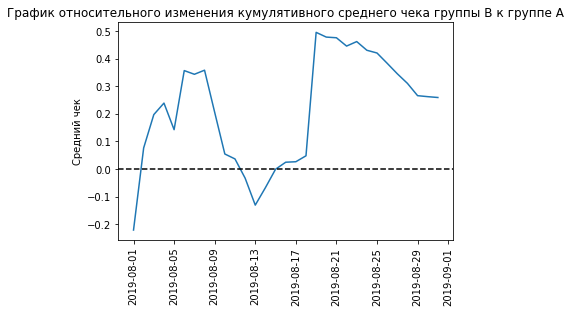

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Средний чек')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Нужно проверить на крупные заказы и выбросы.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

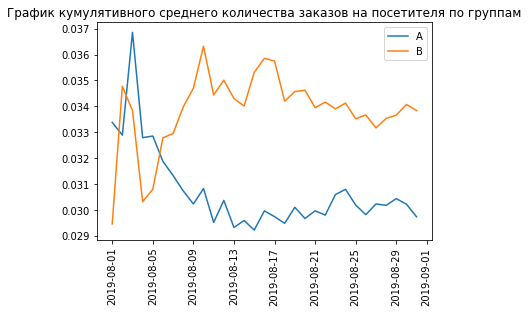

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.xticks(rotation=90)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.show()

Конверсия группы A падает, а конверсия группы B выше группы А, но постепенно тоже снижается.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

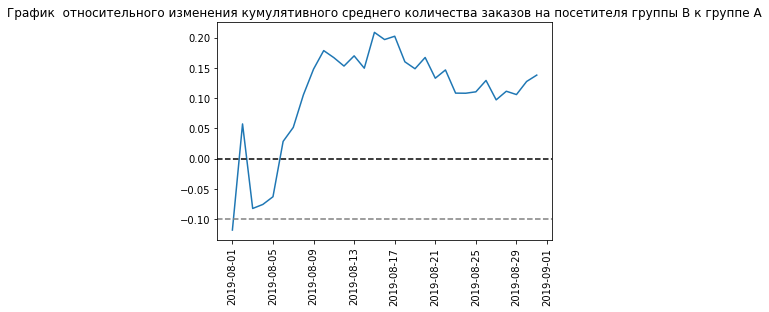

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=90)

plt.title('График  относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова начала снижаться, 
В целом конверсия группы В выше, чем А. На графике конверсия еще не установилась, выводы делать рано. Стоит проанализировать аномалии, возможно, они изменят картину. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


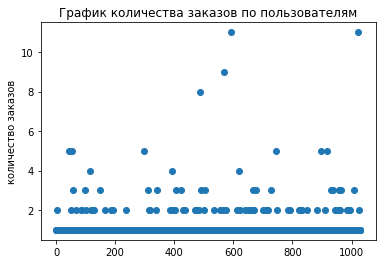

In [22]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']) 

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

plt.title('График количества заказов по пользователям')
plt.ylabel('количество заказов')
plt.show()
#plt.hist(ordersByUsers['orders']) 

Большинство пользователей имеют 1-2 заказа.


### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:

print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


 Не более 5% пользователей совершали более 2 заказов и не более 1% совершали больше 3 заказов. Можно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

         orderId      userId       date  revenue group
425   590470918   1920142716 2019-08-19  1294500  B   
1196  3936777065  2108080724 2019-08-15  202740   B   
858   192721366   1316129916 2019-08-27  93940    A   
1136  666610489   1307669133 2019-08-13  92550    A   
744   3668308183  888512513  2019-08-27  86620    B   
682   1216533772  4266935830 2019-08-29  78990    B   
662   1811671147  4266935830 2019-08-29  78990    A   
743   3603576309  4133034833 2019-08-09  67990    A   
1103  1348774318  1164614297 2019-08-12  66350    A   
1099  316924019   148427295  2019-08-12  65710    A   


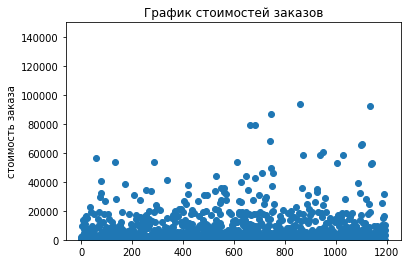

In [24]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim([0,150000])
plt.title('График стоимостей заказов')
plt.ylabel('стоимость заказа')
plt.show()


Есть 2 явно аномальных значения стоимости заказа.

<div class="alert alert-block alert-warning">

Можно увеличить масштаб графика, не учитывая аномально большие значения:
    
    plt.ylim([0,150000])
</div>

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не более 5% пользователей совершали покупку на сумму более 28000 и не более 1% совершали покупку на сумму более 58233.2. Границей аномальных заказов можно взять  сумму заказа 30000р.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [26]:


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

In [27]:
#Посчитаем статистическую значимость различия в среднем количестве заказов между группами

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]),'p-value')

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1),'Относительный прирост среднего числа заказов группы B')


0.017 p-value
0.138 Относительный прирост среднего числа заказов группы B



ГИПОТЕЗЫ (Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть) проверяем критерием Манна-Уитни.
P-value=0,017 меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.






### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Проверяем критерием Манна-Уитни.

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]),'p-value')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1),'Относительный прирост')

0.729 p-value
0.259 Относительный прирост



P-value=0.729 больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.
Относительное различие среднего чека группы В значительно выше группы А на 25,9%.








### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

 
Примем за аномальных пользователей тех, кто совершил более 3 заказов или совершил заказ дороже 30 000 рублей. 
Так мы уберём 1%-5% пользователей с наибольшим числом заказов и 1%-5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 


In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: userId, dtype: int64
57


<div class="alert alert-block alert-warning">


    
Стоит исключить ручной ввод данных, такой код неустойчив к изменениям исходных данных. Вместо этого лучше использовать перцентили:
    
    int(np.percentile(orders['revenue'], [95])) 
</div>

In [30]:
#Сначала подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [31]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]),'P-value')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1),'Относительный прирост')

0.018 P-value
0.148 Относительный прирост


Результаты по среднему количеству заказов практически не изменились. 
P-value=0,018 меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «очищенных данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. 
Относительный прирост среднего группы B к конверсии группы A равен 14.8%.


### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [32]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ),'P-value')


print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ),'Относительный прирост')


0.958 P-value
-0.020 Относительный прирост



P-value=0.958 больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.
Cредний чек группы B стал ниже среднего чека группы A на 2%.

ВЫВОД: Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
    В среднем количестве заказов между группами есть статистически значимые различия по "сырым" и "очищенным" данным.
    График среднего количества заказов показывает, что результаты группы B лучше группы A: 
    имеют тенденцию к росту, либо зафиксировались около среднего значения.Относительный прирост среднего группы B к конверсии группы A равен 14.8%
    Остановить тест, признать его успешным и перейти к проверке следующей гипотезы.
    
    Наиболее перспективные гипотезы по ICE: 
8	Запустить акцию, дающую скидку на товар в день рождения	16.200000
0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	13.333333
7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	11.200000
6	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	8.000000

  Наиболее перспективные гипотезы по RICE:
7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	112.0
2	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	56.0
0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	40.0
6	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	40.0

    


    
* https://medium.com/statistics-experiments 
* https://your-scorpion.ru/ab-tests-check-mathematics/

  